# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [57]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create two new dataframes
north_df = pd. read_csv("NorthCallCenter.csv") # reads in the north csv file
south_df = pd.read_csv("SouthCallCenter.csv") # reads in the south csv file

north_df.head() # shows the first five rows of the data
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
#Code Used:
north_df.info() #gives us information about the data set, which includes number of coulumns, 
#data type for each coulunm
north_df["Rep ID"] # tells us about the ID of each sales rep assigned for each call
north_reps = north_df["Rep ID"].unique() # gives info about the names of Rep ID column in North branch
len(north_reps)# gives info about the number of reps in North branch

# we have 9 reps in North branch

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [58]:
#Code Used:
south_df.info() #gives us information about the data set, which includes number of columns, 
#data type for each colunm
south_df["Rep ID"] # tells us about the IDD of each sales rep assiggned for each call
south_reps = south_df["Rep ID"].unique() # gives info about the names of reps in South branch
len(south_reps)# gives info about the number of reps in South branch

# we have 11 reps in South branch

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [59]:
#Code Used:
north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()
# tells us the average minutes for the selected columns in north branch

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [60]:
#Code Used:
south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()
# tells us the average minutes for the selected columns in south branch

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [81]:
# Code Used:

south_df_sum = south_df[["Calls","Time Block"]].groupby("Time Block").sum() # subset "Calls"and "Time Block",
# then grouped them by "Time Block" to dispaly the number of calls received for each time block in south data

north_df_sum = north_df[["Calls","Time Block"]].groupby("Time Block").sum() # subset "Calls"and "Time Block",
# then grouped them by "Time Block" to dispaly the number of calls received for each time block in north data


print(south_df_sum)
print(north_df_sum)
north_df_sum.add(south_df_sum, fill_value=0) # sums up the number of calls received in north and south data for the
# time blocks

            Calls
Time Block       
10:00 AM       56
11:00 AM       31
12:00 PM       75
1:00 PM        23
2:00 PM        30
3:00 PM        43
4:00 PM        25
5:00 PM        26
9:00 AM         5
            Calls
Time Block       
10:00 AM       43
11:00 AM       25
12:00 PM       45
1:00 PM        17
2:00 PM        35
3:00 PM        30
4:00 PM        28
5:00 PM        17
9:00 AM         5


,Calls
Time Block,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

In [62]:
north_df.info() #gives us information about the data set, which includes number of columns, 
#data type for each coulunm
south_df.info() #gives us information about the data set, which includes number of columns, 
#data type for each colunm

# Here, I was able to get information about the data set, and I saw that the "Incoming Wait Time" has lesser non-null 
# values compared with other columns, this made me to call .isna() function on the column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Yes, there are missing data in the "Incoming Wait Time" column . I would leave the number of rows that have missing data, beacause it may be that outgoing calls are made at that time.

In [82]:
# Code Used

north_df["Incoming Wait Time"].isna().sum() # returns the number of missing values in the column selected for north data


163

created missing indicator for: Incoming Wait Time


<AxesSubplot:xlabel='index'>

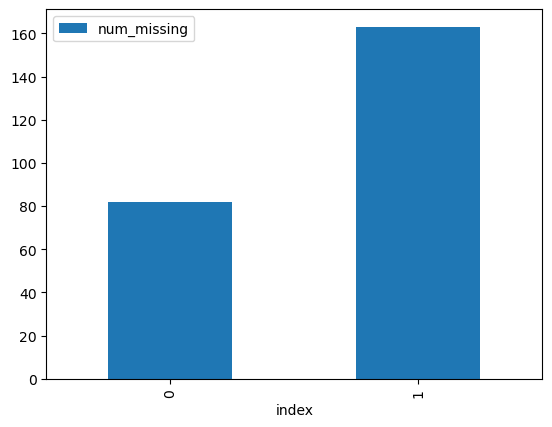

In [78]:
# first create missing indicator for features with missing data
for col in north_df.columns:
    missing = north_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        north_df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in north_df.columns if 'ismissing' in col]
north_df['num_missing'] = north_df[ismissing_cols].sum(axis=1)

north_df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [64]:
south_df["Incoming Wait Time"].isna().sum()# returns the number of missing values in the column selected for south data


188

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I called .unique() function on north["Sale"] to see have a view oh how the two YES were written, ("YES", "YES "),
I then used .replace() function to correct the error made while typing,so that we can have a single "YES".

In [83]:

north_df.Sale.unique()# this returns the number of unique values for "Sale" column in north data


array(['NO', 'YES'], dtype=object)

In [89]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'] = north_df['Sale'].replace(['YES '], 'YES')# this replaces and correct the way YES was wrongly spelt,
# and writes in the correct single format.
north_df.Sale.unique()# this returns the number of unique values for "Sale" column in north data


array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicates in the two data sets.

In [85]:
#Code Used
# Find duplicate rows

north_df[north_df.duplicated()]
south_df[south_df.duplicated()]
# Add Additional Cells as needed.
#north_call.duplicated()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: There are no unnecessary data in the two data sets.

In [88]:
#Code Used
north_df.nunique()# this returns the number of unique values for each column in north data
south_df.nunique()# this returns the number of unique values for each column in south data
# Add Additional Cells as needed.


Unnamed: 0               314
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                    11
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [69]:
# Create dataframe for the entire company named df

df = pd.concat([north_df,south_df])# joins two dataframes into one by row.
print(df)
len(df)# tells us the number of rows in the data set
df.head()

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
309         309  South  Product Support    5:00 PM             Outgoing     D   
310         310  South  Product Support    5:00 PM             Outgoing     C   
311         311  South  Product Support    5:00 PM             Outgoing     C   
312         312  South  Product Support    5:00 PM             Outgoing     C   
313         313  South  Product Support    5:00 PM             Outgoing     D   

     Rep ID Sale  Lost Call

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent: 37
- South Branch = Eric: 35


In [15]:
# Code Used
df['Rep ID'].unique() # gives the number of unique values in the selected column
df[["Calls", "Branch","Rep ID"]].groupby(['Rep ID',"Branch"]).sum().sort_values("Calls", ascending = False)
# This tells us the number of calls each Rep of each branch has and sorts it by decending order.

# Add Additional Cells as needed.

,,Calls
Rep ID,Branch,
Brent,North,37
Eric,South,35
Randy,South,33
Sandy,South,32
Helga,South,31
Lilly,North,30
Todd,North,29
Duke,North,29
George,South,29


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 0.03
- South Branch = 0.01
- Company Wide = 0.02
- Do any of these fall out of the optimal range of 2-5%?:  No, all are within the optimal range of 2-5%

In [90]:
# Code Used
north_call["Abandoned"].mean()# give the average value of the Abandoned calls in north data
south_call["Abandoned"].mean()# give the average value of the Abandoned calls in south data
df["Abandoned"].mean()# give the average value of the Abandoned calls in df data
# Add Additional Cells as needed.

0.01967799642218247

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%
- South Branch = 38.10%
- Company Wide = 38.94%

In [106]:
# Code Used
#(((north_df["Incoming Wait Time"] <= 2).sum())/((north_df["Incoming or Outgoing"] == "Incoming").sum()))*100
(((south_df["Incoming Wait Time"] <= 2).sum())/((south_df["Incoming or Outgoing"] == "Incoming").sum()))*100
#(((df["Incoming Wait Time"] <= 2).sum())/((df["Incoming or Outgoing"] == "Incoming").sum()))*100


#((north_df["Incoming Wait Time"] <= 2).sum()) # sum the number of "Incoming Wait Time" that are lesser than 2
#(north_df["Incoming or Outgoing"] == "Incoming").sum() # sum the number of incoming calls in "Incoming or Outgoing" column
# Divide and multiply by 100 to gget the percentage.   

# Add Additional Cells as needed.

38.095238095238095

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [95]:
# Code Used 
north_df["Incoming Wait Time"].mean() # gets the average value of Incoming Wait Time for north data
south_df["Incoming Wait Time"].mean()# gets the average value of Incoming Wait Time for south data
df["Incoming Wait Time"].mean()# gets the average value of Incoming Wait Time for df data


3.019230769230769

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: Bar chart; It is great to show categorical features against numeric values.

<AxesSubplot:xlabel='Queue'>

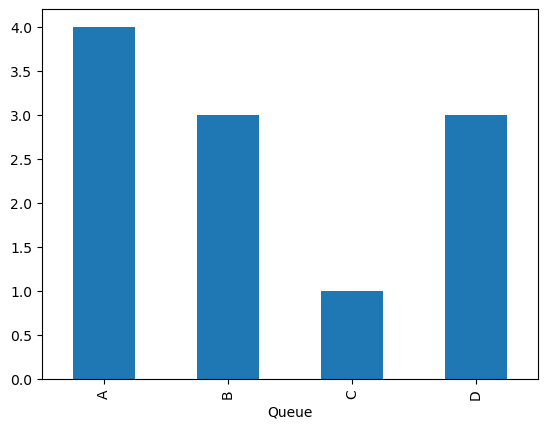

In [35]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt
import seaborn as sns


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df[["Queue", "Abandoned"]].groupby("Queue").agg("sum")
#for i in range(4):
#    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
#plt.barchart(x= queues, y= abandonment_rates)
queue_dict["Abandoned"].plot(kind = "bar")


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: Bar chart; It is great to show categorical features against numeric values.

Rep ID
Amanda    2.400000
Andy      3.600000
Brent     2.125000
Cam       2.909091
Duke      2.785714
Joe       3.600000
Lilly     3.083333
Todd      3.500000
Xander    3.333333
Name: Incoming Wait Time, dtype: float64


<AxesSubplot:xlabel='Rep ID'>

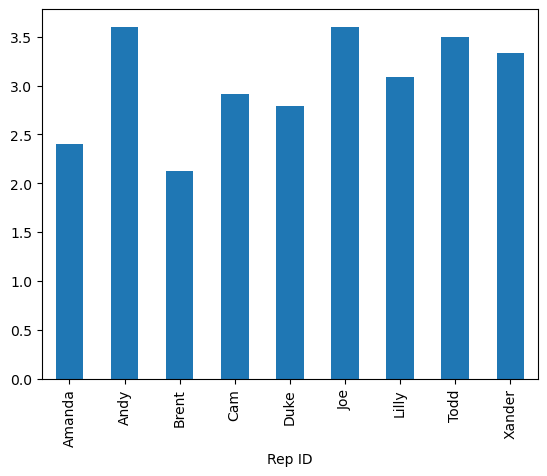

In [101]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

#north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean()


# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
print(north_plt)
north_plt.plot(kind="bar")

Rep ID
Amanda    60.000000
Andy      30.000000
Brent     75.000000
Cam       45.454545
Duke      42.857143
Joe       20.000000
Lilly     33.333333
Todd      33.333333
Xander    33.333333
Name: Service Level %, dtype: float64


<AxesSubplot:xlabel='Rep ID'>

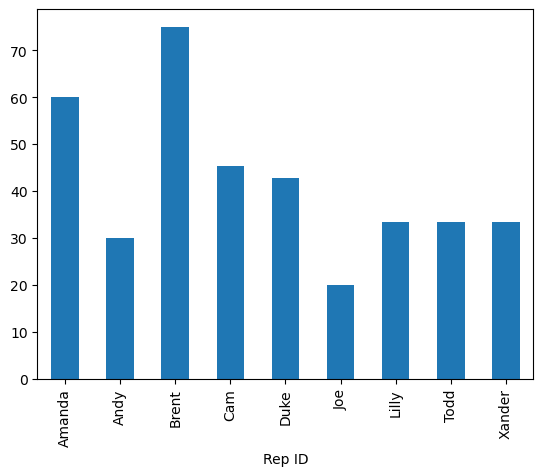

In [43]:
print(service_level["Service Level %"]) # tells "Service Level %"
service_level["Service Level %"].plot(kind = "bar")

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:  Incoming is 208; Outgoingis 351

> Chart style you chose and why:  Bar chart; It is great to show categorical features against numeric values.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


<AxesSubplot:xlabel='Call Purpose'>

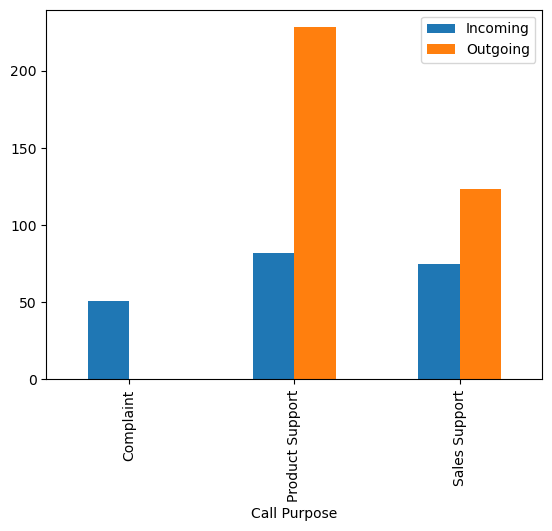

In [56]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:


pd.get_dummies(df["Incoming or Outgoing"])

df2 = pd.concat([df,pd.get_dummies(df["Incoming or Outgoing"])], axis = 1)

df2[["Call Purpose", "Incoming", "Outgoing"]].groupby("Call Purpose").sum().plot(kind = "bar")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: Based on the values below especially abandonment rate,  south branch is operating more efficiently

Abandonment rates: 
- North Branch = 0.03
- South Branch = 0.01
- Company Wide = 0.02

Service level
- North Branch = 40.24%
- South Branch = 38.10%
- Company Wide = 38.94%

average speed of answer
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: North branch would benefit from extra help, beacuse of the cll abandonment rate and the number of resp is lesser than that of south branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I would love to know about customer satisfaction based on the way they treated or responded to them


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why:  Bar chart; It is great to show categorical features against numeric values.

<AxesSubplot:xlabel='Time Block'>

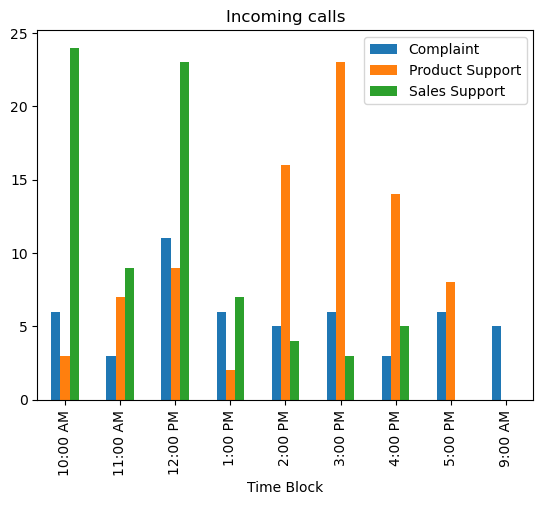

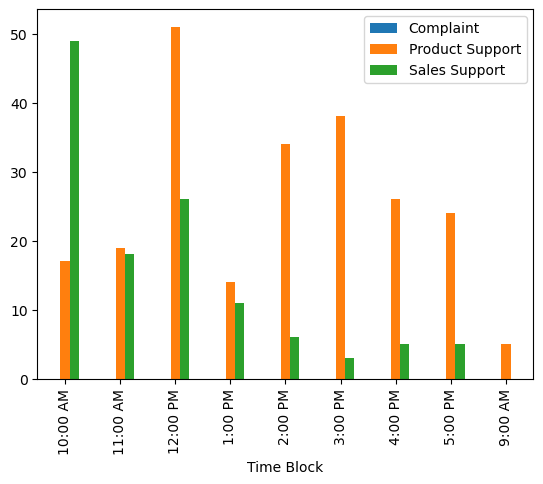

In [122]:
# Create your Bonus Mission visualization here!
#call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

df2 = pd.concat([df,pd.get_dummies(df["Call Purpose"])], axis = 1) # splits the 
# incoming and outcoming calls

# incoming  calls
df2[df2["Incoming or Outgoing"] == "Incoming"][["Time Block", "Call Purpose","Complaint", "Product Support", "Sales Support"]].groupby(["Time Block"]).sum().plot(kind = "bar") # plots the 
plt.title("Incoming calls")
df2[df2["Incoming or Outgoing"] == "Outgoing"][["Time Block", "Call Purpose","Complaint", "Product Support", "Sales Support"]].groupby(["Time Block"]).sum().plot(kind = "bar") # plots the 
plt.title("Outgoing calls")

# Use groupby to plot based on time blocks:


# Use groupby and get_group to select which call purpose to plot: